<a href="https://colab.research.google.com/github/marcosfmmota/RL-mo436-project1/blob/main/project1_mo436.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Reinforcement Learning - MO436

Equipe:

*   Alex Silva Torres - 161939
*   Darlinne Hubert Palo Soto - 264955
*   Lucas Pini Tanabe - 147046
*   Marcos Felipe de Menezes Mota - 211893
*   Mariane Limoli Almeida - 233802



## The Problem

Text-based games are complex, interactive simulations in which text describes the game state and players make progress by entering text commands [1]. Such environment is a fertile space for reinforcement learning research because it requires from  the agent language understaning of input data and playing skills like long-term memory, planning, exploration and common sense [1].

Text-based game is one of the first genre of video-games, since de 80's there is interest in such structure. The main behavior of the game is a presentation text that set up the environment, also called scenes, and sometimes the goal of the game. In this set up the user can type open text, but only a subset of this text can be understand as commands that change the environment. The agent has an inventory to store objects that can be used later stages of the game. Below we see initial interaction in a text-based game.

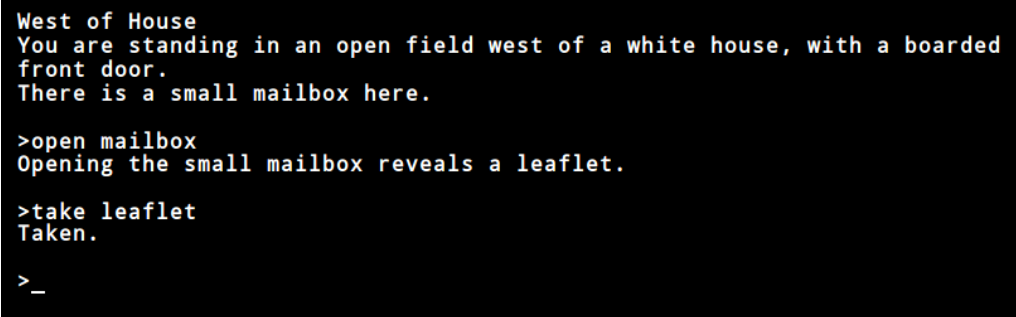

Text-based games authored by humans provide challenges beyond current reinforcement learning algorithms [1]. To provide an environment to foster research in this problem the *TextWorld* sandbox was created.

*TextWorld* is a Python framework for training and testing RL agents on text-based games. It is inspired by the *OpenAI Gym* environment. But besides compiling a set of games for training RL agents, *TextWorld* allow for automatic generation of games following a set of configurable options. Therefore, the user can control features like the size of game, maximum number of steps to solution, allowable commands, breadth of the quest, sintatic complexity, and reward type.  

*TextWorld* framework has the following architecture:
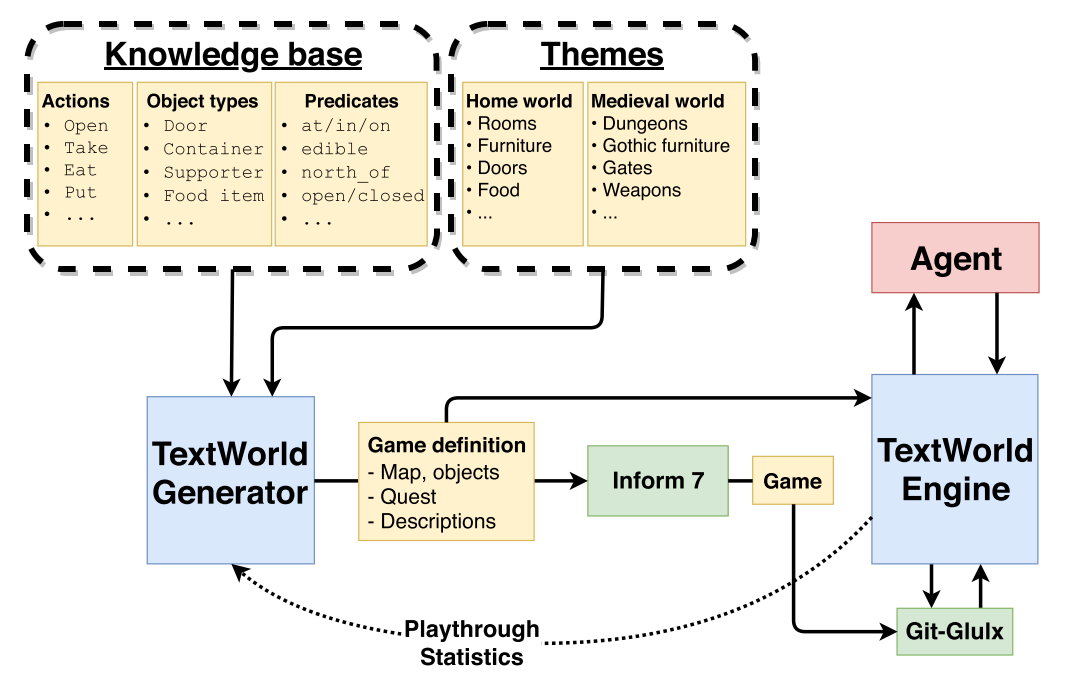

*TextWorld* architecture uses a knowledge base and a context-free grammar (CFG) to precisely describe the state-action pair. A theme can be applied so the text looks more similiar to human-design text-game. A quest is the goal of the game and its final state. The reward function can also be configured as sparse, balanced and dense. This means that a positive reward can be achieved only in the final state in a sparse mode, in some intermediary states in balanced mode or in every state in dense mode. 

The framewok uses the *Inform 7* language to create games in the most common text-game format *z-type* and *glux*. This allows the loading of human-made games and use a large number of pre-existing games from the text-game community.

## MDP Formulation

Text-based game, in general, can be modeled as partially observable Markov decision process (POMDP). But since it POMDP is a considerely harder problem for traditinal methods, *TextWorld* generated problems have a Markov Decision Process (MDP) formulation.

A *TextWorld* generated game MDP is a 5-tuple $(S, A, T, R, \gamma)$, where: $S$ is the set of environment states, $A$ is the set of actions and $A_{s_t}$ are those actions available at state $s_t \in S$, $T(s_t, a, s_{t+1})$ is the transition function that depends on current state and action, $R:S \times A \rightarrow \mathbb{R}$ is the reward function, and $\gamma \in [0, 1]$ is the discount factor. We detail $S, A, T$ below.

**Environment States**

Game state are defined as logical predicates. These predicates define the relationship between the entities (objects, player, room, etc) in the game. For example:


```
 s_t = at(fridge, kitchen) ⊗ at(table, kitchen) ⊗ in(apple, fridge) 
        ⊗  open(fridge) ⊗ at(P, kitchen)
```
This means the player P is at a room called kitchen where there is a fridge and a table, also the fridge is open and there is an apple inside it.

The winning states is any state where the winning conditions (a set of predicate facts) are true.

**State Transition Function**

The state transition function is a set of linear logical rules specifying what is possible in the game. These rules form a knowledge base. For example:


```
 open(C) :: $at(P, R) ⊗ $at(C, R) ⊗ closed(C) -> open(C)
 take(F, C) :: $at(P, R) ⊗ $at(C, R) ⊗ $open(C) ⊗ in(F, C) -> in(F, I)
```
Linear logic implication (->) has a consume-generate interpretation. The predicates on the left-hand side are "consumed" and the right-hand side is generated. Thus the first rule says that to perform the *open*  action, the player P is at a room R, the container C is at the same room R and the container is closed, after that we have the player and container at the same place ($ operator) but now the container C is open. The second rule says that a *take* action needs player P is at a room R, container C is at room R, C is open and the object F is in C then the object F is at the player inventary.  

Such formalism maps an action in one state to another, subsequent, state.

**Action Space**
The action space are the set of rules in the knowledge-based bounded to real game variables. Using the *take* predicate as example:

```
  take(apple, fridge) :: $at(P, kitchen) ⊗ $at(fridge, kitchen) ⊗ $open(fridge)
                         ⊗ in(apple, fridge) -> in(apple, I)
```
We can see that actions in *TextWorld* is a realization of the state transition function. This is a particular aspect of the environment because of its generation capabilities. In the generation process of games the user of the environment can limit the number of objects, rooms and reward caracteristics thus delimiting the action space for each game.


## Installation and set up

In [81]:
# Installing TextWorld environment
%pip install textworld
%pip install textworld[vis]

## Generating a set of games as benchmark

We generated two sets of games to evaluate the caracteristics of the RL methods. One set is five *custom* games where the only reward happens in the final state and the maximum length for solution in 5 steps. The other one is a set of 5 games where the reward is *dense*, which means that at every state transition the agent gets a reward.

The nature of the of the environment is episodic and deterministic. The terminal state is defined by the generation process of *TextWorld*.

In [82]:
!tw-make custom --quest-length 5 --seed 1234 --output games/custom_game1.ulx
!tw-make custom --quest-length 5 --seed 2134 --output games/custom_game2.ulx
!tw-make custom --quest-length 5 --seed 3124 --output games/custom_game3.ulx
!tw-make custom --quest-length 5 --seed 3214 --output games/custom_game4.ulx
!tw-make custom --quest-length 5 --seed 4321 --output games/custom_game5.ulx

Global seed: 1234
Game generated: /content/games/custom_game1.ulx
Global seed: 2134
Game generated: /content/games/custom_game2.ulx
Global seed: 3124
Game generated: /content/games/custom_game3.ulx
Global seed: 3214
Game generated: /content/games/custom_game4.ulx
Global seed: 4321
Game generated: /content/games/custom_game5.ulx


In [83]:
!tw-make tw-simple --rewards dense --goal detailed --seed 1234 --output games/simple_dense_game1.ulx
!tw-make tw-simple --rewards dense --goal detailed --seed 2134 --output games/simple_dense_game2.ulx
!tw-make tw-simple --rewards dense --goal detailed --seed 3124 --output games/simple_dense_game3.ulx
!tw-make tw-simple --rewards dense --goal detailed --seed 3214 --output games/simple_dense_game4.ulx
!tw-make tw-simple --rewards dense --goal detailed --seed 4321 --output games/simple_dense_game5.ulx

Global seed: 1234
Game generated: /content/games/simple_dense_game1.ulx
Global seed: 2134
Game generated: /content/games/simple_dense_game2.ulx
Global seed: 3124
Game generated: /content/games/simple_dense_game3.ulx
Global seed: 3214
Game generated: /content/games/simple_dense_game4.ulx
Global seed: 4321
Game generated: /content/games/simple_dense_game5.ulx


Some examples of interaction for agent interaction with the game.
How to start a game, print the state, check score, check inventory and current player score.   

In [84]:
import textworld

env = textworld.start("./games/custom_game1.ulx")
game_state = env.reset()


In [85]:
print(game_state.feedback)




                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ______   _______   __        _______  
             |  \  _  |  \ /      \ |       \ |  \      |       \ 
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $

In [86]:
print("----Initial State----")
print("Player current score: ", game_state.score)
print("Player Inventory: ", game_state.inventory)
print("-----State After command ----")
game_state, score, done = env.step("close type 1 box")
print(game_state.feedback)
print("Player current score: ", score)
print("Player Inventory: ", game_state.inventory)
print("Is it the final state? ", done)

----Initial State----
Player current score:  0
Player Inventory:  None
-----State After command ----
You close the type 1 box.


Player current score:  0
Player Inventory:  None
Is it the final state?  False


Using the interface to Gym we can list the entities in the game, valid commands at a given state and true facts on the current state. 

In [87]:
import textworld.gym
import gym
request_infos = textworld.EnvInfos(admissible_commands=True, entities=True, facts=True, command_templates=True)

# Requesting additional information should be done when registering the game.
env_id = textworld.gym.register_game('games/custom_game1.ulx', request_infos)
env = gym.make(env_id)

obs, infos = env.reset()
print("Entities: {}".format(infos["entities"]))
print("Admissible commands:\n  {}".format("\n  ".join(infos["admissible_commands"])))
print("Facts:", infos["facts"])
print("Template of Possible commands")
print(infos["command_templates"])

Entities: ['door', 'American limited edition gate', 'type 1 box', 'formless box', 'formless passkey', 'shirt', 'cloak', 'table', 'American limited edition keycard', 'type 1 keycard', 'teacup', 'broom', 'north', 'south', 'east', 'west']
Admissible commands:
  close type 1 box
  drop broom
  drop teacup
  drop type 1 keycard
  examine American limited edition gate
  examine American limited edition keycard
  examine broom
  examine door
  examine teacup
  examine type 1 box
  examine type 1 keycard
  insert broom into type 1 box
  insert teacup into type 1 box
  insert type 1 keycard into type 1 box
  inventory
  look
  open door
  take American limited edition keycard from type 1 box
Facts: [Proposition('at', (Variable('P', 'P'), Variable('scullery', 'r'))), Proposition('at', (Variable('type 1 box', 'c'), Variable('scullery', 'r'))), Proposition('at', (Variable('formless box', 'c'), Variable('bedchamber', 'r'))), Proposition('at', (Variable('formless passkey', 'k'), Variable('bedchamber

As a way to use the MDP formulation described before and not the raw text output of the game, we will pass to our agents the actions $A(s)$ as the set *admissile_commands* and the state will be represented as the true propositions in a given moment using *facts*. These information can be recovered from the game at any given moment using the *textworld.EnvInfos* dictionary.

## Random Agent as Benchmark

In [88]:
from typing import Mapping, Any

import numpy as np

import textworld.gym

import os
from glob import glob

import gym


class RandomAgent(textworld.gym.Agent):
    """ Agent that randomly selects a command from the admissible ones. """
    def __init__(self, seed=1234):
        self.seed = seed
        self.rng = np.random.RandomState(self.seed)

    @property
    def infos_to_request(self) -> textworld.EnvInfos:
        return textworld.EnvInfos(admissible_commands=True)
    
    # Choose a random action from possible commands
    def act(self, obs: str, score: int, done: bool, infos: Mapping[str, Any]) -> str:
        return self.rng.choice(infos["admissible_commands"])
        

In [89]:
def play(agent, path, max_step=100, nb_episodes=10, verbose=True):
    infos_to_request = agent.infos_to_request
    infos_to_request.max_score = True  # Needed to normalize the scores.
    
    gamefiles = [path]
    if os.path.isdir(path):
        gamefiles = glob(os.path.join(path, "*.ulx"))
        
    env_id = textworld.gym.register_games(gamefiles,
                                          request_infos=infos_to_request,
                                          max_episode_steps=max_step)
    env = gym.make(env_id)  # Create a Gym environment to play the text game.
    if verbose:
        if os.path.isdir(path):
            print(os.path.dirname(path), end="")
        else:
            print(os.path.basename(path), end="")
        
    # Collect some statistics: nb_steps, final reward.
    avg_moves, avg_scores, avg_norm_scores = [], [], []
    for no_episode in range(nb_episodes):
        obs, infos = env.reset()  # Start new episode.

        score = 0
        done = False
        nb_moves = 0
        while not done:
            command = agent.act(obs, score, done, infos)
            obs, score, done, infos = env.step(command)
            nb_moves += 1
        
        agent.act(obs, score, done, infos)  # Let the agent know the game is done.
                
        if verbose:
            print(".", end="")
        avg_moves.append(nb_moves)
        avg_scores.append(score)
        avg_norm_scores.append(score / infos["max_score"])

    env.close()
    msg = "  \tavg. steps: {:5.1f}; avg. score: {:4.1f} / {}."
    if verbose:
        if os.path.isdir(path):
            print(msg.format(np.mean(avg_moves), np.mean(avg_norm_scores), 1))
        else:
            print(msg.format(np.mean(avg_moves), np.mean(avg_scores), infos["max_score"]))

In [90]:
play(RandomAgent(), "./games/custom_game1.ulx")
play(RandomAgent(), "./games/custom_game2.ulx")
play(RandomAgent(), "./games/custom_game3.ulx")
play(RandomAgent(), "./games/custom_game4.ulx")
play(RandomAgent(), "./games/custom_game5.ulx")

custom_game1.ulx..........  	avg. steps:  92.8; avg. score:  0.2 / 1.
custom_game2.ulx..........  	avg. steps:  99.6; avg. score:  0.1 / 1.
custom_game3.ulx..........  	avg. steps: 100.0; avg. score:  0.0 / 1.
custom_game4.ulx..........  	avg. steps: 100.0; avg. score:  0.0 / 1.
custom_game5.ulx..........  	avg. steps: 100.0; avg. score:  0.5 / 2.


In [91]:
play(RandomAgent(), "./games/simple_dense_game1.ulx")
play(RandomAgent(), "./games/simple_dense_game2.ulx")
play(RandomAgent(), "./games/simple_dense_game3.ulx")
play(RandomAgent(), "./games/simple_dense_game4.ulx")
play(RandomAgent(), "./games/simple_dense_game5.ulx")

simple_dense_game1.ulx..........  	avg. steps: 100.0; avg. score:  3.5 / 10.
simple_dense_game2.ulx..........  	avg. steps:  98.2; avg. score:  4.0 / 7.
simple_dense_game3.ulx..........  	avg. steps: 100.0; avg. score:  3.9 / 7.
simple_dense_game4.ulx..........  	avg. steps: 100.0; avg. score:  3.5 / 10.
simple_dense_game5.ulx..........  	avg. steps: 100.0; avg. score:  4.3 / 10.


## Monte Carlo Control

In [99]:
from typing import Mapping, Any

import numpy as np
import textworld
import textworld.gym
import gym

import os
from glob import glob
import collections

class State:

  def __init__(self, state_facts):
    self.state_facts = state_facts
  
  def is_equal(self, another_state):
    return collections.Counter(self.state_facts) == collections.Counter(another_state.state_facts)

In [103]:

class MonteCarloAgent(textworld.gym.Agent):

  def __init__ (self, n0=1, gamma=1, seed=1234):
    self.seed = seed
    self.rng = np.random.RandomState(self.seed)
    self.n0 = n0
    self.gamma = gamma
    self.state_map = []
    self.epsilon = 1

  @property
  def infos_to_request(self):
    return textworld.EnvInfos(admissible_commands=True, facts=True, 
                              max_score=True, command_templates=True)

  def state_value_prediction():
    pass

  # def epsilon_greedy_improvement(qsa): 

  def generate_random_policy(self, env):
    
    obs, infos = env.reset()
    current_state = State(infos["facts"])
    self.state_map.append(current_state)
    done = False
    policy = {}
    while not done:
      command = self.rng.choice(infos["admissible_commands"])
      obs, score, done, infos = env.step(command)
      policy[len(self.state_map)] = [command, score]
      current_state = State(infos["facts"])
      if not current_state.is_equal(self.state_map[-1]):
        self.state_map.append(current_state)

    return policy

      


  def act(self, observation, score, done, infos):
    pass

  def play(self, path, max_step=100, nb_episodes=10, verbose=True):
    infos_to_request = self.infos_to_request
    infos_to_request.max_score = True  # Needed to normalize the scores.
    
    gamefiles = [path]
    if os.path.isdir(path):
        gamefiles = glob(os.path.join(path, "*.ulx"))
        
    env_id = textworld.gym.register_games(gamefiles,
                                          request_infos=infos_to_request,
                                          max_episode_steps=max_step)
    env = gym.make(env_id)  # Create a Gym environment to play the text game.

    random_policy = self.generate_random_policy(env)
    print(random_policy)
    # if verbose:
    #     if os.path.isdir(path):
    #         print(os.path.dirname(path), end="")
    #     else:
    #         print(os.path.basename(path), end="")
        
    # # Collect some statistics: nb_steps, final reward.
    # avg_moves, avg_scores, avg_norm_scores = [], [], []
    # for no_episode in range(nb_episodes):
    #     obs, infos = env.reset()  # Start new episode.

    #     score = 0
    #     done = False
    #     nb_moves = 0
    #     while not done:
    #         command = agent.act(obs, score, done, infos)
    #         obs, score, done, infos = env.step(command)
    #         nb_moves += 1
        
    #     agent.act(obs, score, done, infos)  # Let the agent know the game is done.
                
    #     if verbose:
    #         print(".", end="")
    #     avg_moves.append(nb_moves)
    #     avg_scores.append(score)
    #     avg_norm_scores.append(score / infos["max_score"])

    # env.close()
    # msg = "  \tavg. steps: {:5.1f}; avg. score: {:4.1f} / {}."
    # if verbose:
    #     if os.path.isdir(path):
    #         print(msg.format(np.mean(avg_moves), np.mean(avg_norm_scores), 1))
    #     else:
    #         print(msg.format(np.mean(avg_moves), np.mean(avg_scores), infos["max_score"]))


In [105]:
agent = MonteCarloAgent()
agent.play("./games/simple_dense_game1.ulx")

{1: ['open chest drawer', 0], 2: ['close chest drawer', 0], 3: ['open chest drawer', 0], 4: ['open antique trunk', 1], 5: ['take old key from antique trunk', 2], 6: ['put old key on king-size bed', 2], 7: ['close antique trunk', 2], 8: ['close chest drawer', 2], 9: ['take old key from king-size bed', 2], 10: ['drop old key', 2], 11: ['open antique trunk', 2], 12: ['close antique trunk', 2], 13: ['take old key', 2], 14: ['unlock wooden door with old key', 3], 15: ['drop old key', 3], 16: ['take old key', 3], 17: ['lock wooden door with old key', 3], 18: ['put old key on king-size bed', 3], 19: ['open antique trunk', 3], 20: ['close antique trunk', 3], 21: ['take old key from king-size bed', 3], 22: ['open chest drawer', 3], 23: ['close chest drawer', 3], 24: ['open chest drawer', 3], 25: ['unlock wooden door with old key', 3], 26: ['open wooden door', 4], 27: ['close wooden door', 4], 28: ['put old key on king-size bed', 4], 29: ['take old key from king-size bed', 4], 30: ['open wooden 

Example code MC

In [ ]:
import gym
import numpy as np
import operator
from IPython.display import clear_output
from time import sleep
import random
import itertools
import tqdm

tqdm.monitor_interval = 0

def create_random_policy(env):
     policy = {}
     for key in range(0, env.observation_space.n):
          current_end = 0
          p = {}
          for action in range(0, env.action_space.n):
               p[action] = 1 / env.action_space.n
          policy[key] = p
     return policy

def create_state_action_dictionary(env, policy):
    Q = {}
    for key in policy.keys():
         Q[key] = {a: 0.0 for a in range(0, env.action_space.n)}
    return Q

def run_game(env, policy, display=True):
     env.reset()
     episode = []
     finished = False

     while not finished:
          s = env.env.s
          if display:
               clear_output(True)
               env.render()
               sleep(1)

          timestep = []
          timestep.append(s)
          n = random.uniform(0, sum(policy[s].values()))
          top_range = 0
          for prob in policy[s].items():
                top_range += prob[1]
                if n < top_range:
                      action = prob[0]
                      break 
          state, reward, finished, info = env.step(action)
          timestep.append(action)
          timestep.append(reward)

          episode.append(timestep)

     if display:
          clear_output(True)
          env.render()
          sleep(1)
     return episode

def test_policy(policy, env):
      wins = 0
      r = 100
      for i in range(r):
            w = run_game(env, policy, display=False)[-1][-1]
            if w == 1:
                  wins += 1
      return wins / r

def monte_carlo_e_soft(env, episodes=100, policy=None, epsilon=0.01):
    if not policy:
        policy = create_random_policy(env)  # Create an empty dictionary to store state action values    
    Q = create_state_action_dictionary(env, policy) # Empty dictionary for storing rewards for each state-action pair
    returns = {} # 3.
    
    for _ in range(episodes): # Looping through episodes
        G = 0 # Store cumulative reward in G (initialized at 0)
        episode = run_game(env=env, policy=policy, display=False) # Store state, action and value respectively 
        
        # for loop through reversed indices of episode array. 
        # The logic behind it being reversed is that the eventual reward would be at the end. 
        # So we have to go back from the last timestep to the first one propagating result from the future.
        
        for i in reversed(range(0, len(episode))):   
            s_t, a_t, r_t = episode[i] 
            state_action = (s_t, a_t)
            G += r_t # Increment total reward by reward on current timestep
            
            if not state_action in [(x[0], x[1]) for x in episode[0:i]]: # 
                if returns.get(state_action):
                    returns[state_action].append(G)
                else:
                    returns[state_action] = [G]   
                    
                Q[s_t][a_t] = sum(returns[state_action]) / len(returns[state_action]) # Average reward across episodes
                
                Q_list = list(map(lambda x: x[1], Q[s_t].items())) # Finding the action with maximum value
                indices = [i for i, x in enumerate(Q_list) if x == max(Q_list)]
                max_Q = random.choice(indices)
                
                A_star = max_Q # 14.
                
                for a in policy[s_t].items(): # Update action probability for s_t in policy
                    if a[0] == A_star:
                        policy[s_t][a[0]] = 1 - epsilon + (epsilon / abs(sum(policy[s_t].values())))
                    else:
                        policy[s_t][a[0]] = (epsilon / abs(sum(policy[s_t].values())))

    return policy

env = gym.make('FrozenLake8x8-v0')
policy = monte_carlo_e_soft(env, episodes=5000)
test_policy(policy, env)

0.47

## Q-learning

## SARSA($\lambda$)

## Linear Function Approximator

## Discussion

## References

> [1] M.-A. Côté et al., “TextWorld: A Learning Environment for Text-based Games,” Jun. 2018, [Online]. Available: http://arxiv.org/abs/1806.11532.

> TextWorld Documentation at: https://textworld.readthedocs.io/en/latest/index.html

> TextWorld GitHub repository: https://github.com/microsoft/TextWorld
